In [272]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from utils.data_load import load
import codes
# Load matplotlib images inline
%matplotlib inline
# These are important for reloading any code you write in external .py files.
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem 4: Linear Regression
Please follow our instructions in the same order to solve the linear regresssion problem.

Please print out the entire results and codes when completed.

In [273]:
def get_data():
    """
    Load the dataset from disk and perform preprocessing to prepare it for the linear regression problem.
    """
    X_train, y_train = load('./data/regression/regression_train.csv')
    X_test, y_test = load('./data/regression/regression_test.csv')
    X_valid, y_valid = load('./data/regression/regression_valid.csv')
    return X_train, y_train, X_test, y_test, X_valid, y_valid

X_train, y_train, X_test, y_test, X_valid, y_valid= get_data()


print('Train data shape: ', X_train.shape)
print('Train target shape: ', y_train.shape)
print('Test data shape: ',X_test.shape)
print('Test target shape: ',y_test.shape)
print('Valid data shape: ',X_valid.shape)
print('Valid target shape: ',y_valid.shape)

Train data shape:  (30, 1)
Train target shape:  (30,)
Test data shape:  (30, 1)
Test target shape:  (30,)
Valid data shape:  (20, 1)
Valid target shape:  (20,)


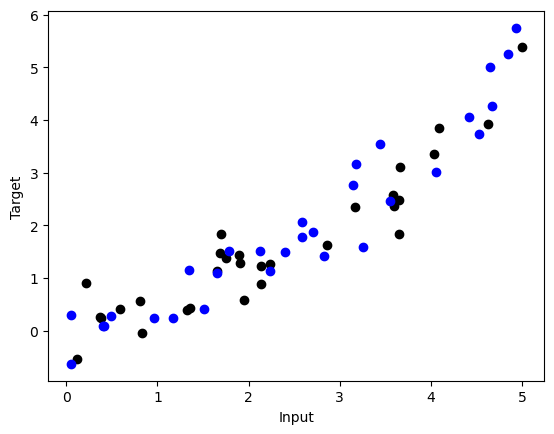

In [275]:
## PART (a):
## Plot the training and test data ##

plt.plot(X_train, y_train,'o', color='black')
plt.plot(X_test, y_test,'o', color='blue')
plt.xlabel('Input')
plt.ylabel('Target')
plt.show()

## Since the training and test data seem to have a linear correlation, linear regression should be an effective method 
## predicting y based on the features x.

## Training Linear Regression
In the following cells, you will build a linear regression. You will implement its loss function, then subsequently train it with gradient descent. You will choose the learning rate of gradient descent to optimize its classification performance. Finally, you will get the opimal solution using closed form expression.

In [276]:
from codes.Regression import Regression

In [277]:
## PART (c):
## Complete loss_and_grad function in Regression.py file and test your results.
regression = Regression(m=1, reg_param=0)
loss, grad = regression.loss_and_grad(X_train,y_train)
print('Loss value',loss)
print('Gradient value',grad)
##

Loss value [1.04554161]
Gradient value [[1.33142275]
 [2.65167278]]


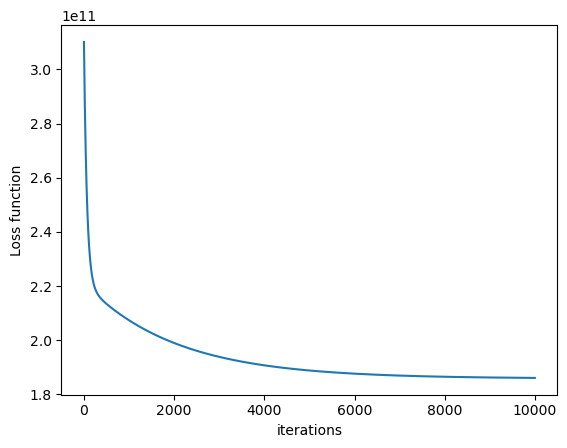

[310152353104.7393, 308785123521.0275, 307438364127.2215, 306111764749.6567, 304805019916.4069, 303517828786.0113, 302249895077.28357, 301000927000.1849, 299770637187.74396, 298558742629.0095, 297364964603.01917, 296189028613.76984, 295030664326.1724, 293889605502.9784, 292765589942.6628, 291658359418.2478, 290567659617.0544, 289493240081.3669, 288434854149.99756, 287392258900.7358, 286365215093.6715, 285353487115.37573, 284356842923.92865, 283375053994.7807, 282407895267.4338, 281455145092.931, 280516585182.1436, 279592000554.83905, 278681179489.52423, 277783913474.0467, 276899997156.94586, 276029228299.54114, 275171407728.74713, 274326339290.60303, 273493829804.50693, 272673689018.14404, 271865729563.09805, 271069766911.13513, 270285619331.15067, 269513107846.769, 268752056194.58557, 268002290783.04184, 267263640651.92395, 266535937432.4754, 265819015308.1142, 265112710975.74524, 264416863607.65973, 263731314814.01154, 263055908605.86234, 262390491358.78845, 261734911777.0368, 261089

In [305]:
## PART (d):
## Complete train_LR function in Regression.py file
loss_history, theta = regression.train_LR(X_train,y_train, alpha=1e-3, B=30, num_iters=10000)
plt.plot(loss_history)
plt.xlabel('iterations')
plt.ylabel('Loss function')
plt.show()
print('Final loss:',loss_history[-1]) 

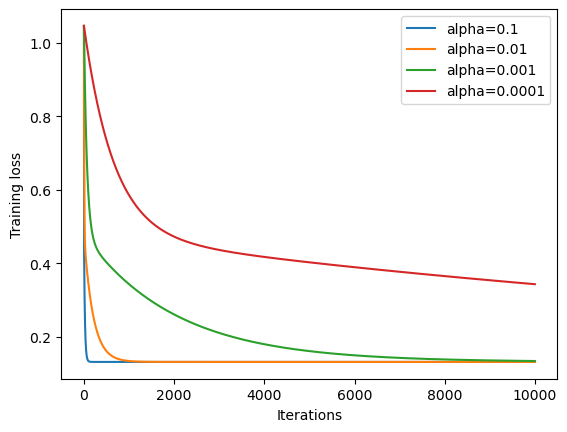

In [279]:
## PART (d) (Different Learning Rates):
from numpy.linalg import norm
alphas = [1e-1, 1e-2, 1e-3, 1e-4]
losses = np.zeros((len(alphas),10000))
# ================================================================ #
# YOUR CODE HERE:
# Train the Linear regression for different learning rates
# ================================================================ #
for i in range(0, len(alphas)):
    losses[i], theta = regression.train_LR(X_train,y_train, alpha=alphas[i])
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
for i, loss in enumerate(losses):
    plt.plot(range(10000), loss, label='alpha='+str(alphas[i]))
plt.xlabel('Iterations')
plt.ylabel('Training loss')
plt.legend()
plt.show()

#The graph shows that all learning rates do not actually converge, since alpha = 0.0001 remains above 0.4 while 
#the others collapse below 0.2

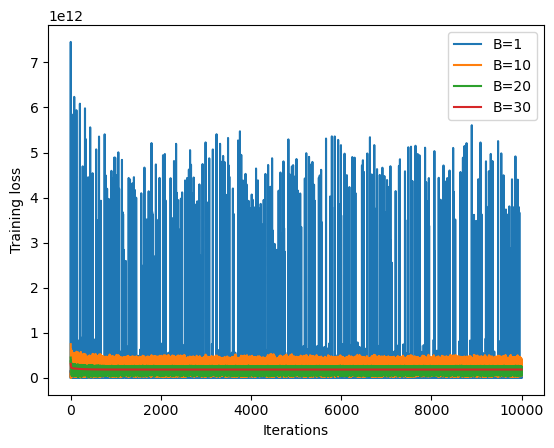

In [300]:
## PART (d) (Different Batch Sizes):
from numpy.linalg import norm
Bs = [1, 10, 20, 30]
losses = np.zeros((len(Bs),10000))
# ================================================================ #
# YOUR CODE HERE:
# Train the Linear regression for different learning rates
# ================================================================ #
for i in range(0, len(Bs)):
    losses[i], theta = regression.train_LR(X_train, y_train, B = Bs[i])

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
fig = plt.figure()
for i, loss in enumerate(losses):
    plt.plot(range(10000), loss, label='B='+str(Bs[i]))
plt.xlabel('Iterations')
plt.ylabel('Training loss')
plt.legend()
plt.show()
fig.savefig('./LR_Batch_test.pdf')

In [8]:
## PART (e):
## Complete closed_form function in Regression.py file
loss_2, theta_2 = regression.closed_form(X_train, y_train)
print('Optimal solution loss',loss_2)
print('Optimal solution theta',theta_2)

Optimal solution loss 0.13208969101982224
Optimal solution theta [-0.37906992  0.8852483 ]


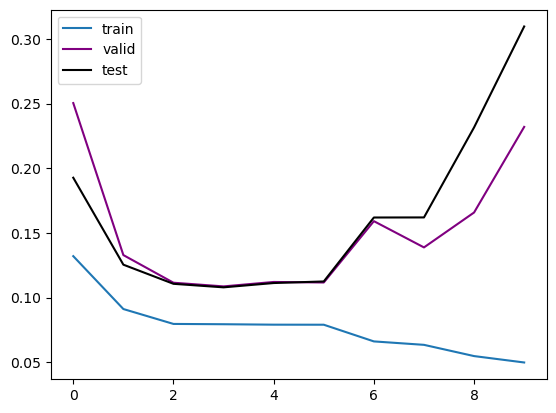

In [298]:
## PART (f):
train_loss=np.zeros((10,1))
valid_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot both the training, validation
# and test loss in the same plot for m range from 1 to 10
# ================================================================ #

for m_iter in range(0, 10):
    regression = Regression(m=m_iter + 1, reg_param=0)
    train_loss[m_iter] = regression.closed_form(X_train, y_train)[0]
    valid_loss[m_iter] = regression.loss_and_grad(X_valid, y_valid)[0]
    test_loss[m_iter] = regression.loss_and_grad(X_test, y_test)[0]
# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
plt.plot(train_loss, label='train')
plt.plot(valid_loss, color='purple', label='valid')
plt.plot(test_loss, color='black', label='test')
plt.legend()
plt.show()

#The plots display both overfitting (towards higher degrees of complexity) as we see the test and validation data losses
# go higher while the training data tends towards 0, and underfitting on the lower degrees of complexity as all three 
#datasets have high losses. The degree polynomial that seems to best fit the data is a degree 4 polynomial(the spot)
#occurs at 3 on the graph, but note that degree 1 polynomial loss is plotted at 0. 

[[0.19273255]
 [0.12550312]
 [0.11070569]
 [0.10798231]
 [0.11130973]
 [0.11252986]
 [0.16197104]
 [0.16202935]
 [0.23163506]
 [0.30966336]]


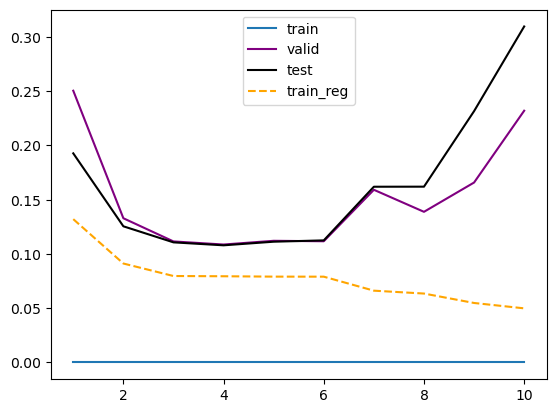

In [329]:
#PART (g):
train_loss=np.zeros((10,1))
train_reg_loss=np.zeros((10,1))
valid_loss=np.zeros((10,1))
test_loss=np.zeros((10,1))
lambda_variable = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
# ================================================================ #
# YOUR CODE HERE:
# complete the following code to plot the training, validation
# and test loss in the same plot for m range from 1 to 10
# ================================================================ #
for m_iter in range(0, 10):
    regression = Regression(m=m_iter + 1, reg_param=lambda_variable[m_iter])
    train_reg_loss[m_iter][0] = regression.closed_form(X_train, y_train)[0]
    valid_loss[m_iter][0] = regression.loss_and_grad(X_valid, y_valid)[0]
    test_loss[m_iter][0] = regression.loss_and_grad(X_test, y_test)[0]

# ================================================================ #
# END YOUR CODE HERE
# ================================================================ #
print(test_loss)
plt.plot(np.arange(1, 11), train_loss, label='train')
plt.plot(np.arange(1, 11), valid_loss, color='purple', label='valid')
plt.plot(np.arange(1, 11), test_loss, color='black', label='test')
plt.plot(np.arange(1, 11), train_reg_loss, color = 'orange', linestyle="dashed", label='train_reg')
plt.legend()
plt.show()


#The value of lambda that seems to work best is lambda = 4 which is 1e-5
